In [1]:
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical
from matplotlib import pyplot

C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 13s - loss: 1.8365 - accuracy: 0.3387 - 13s/epoch - 17ms/step
Epoch 2/25
782/782 - 9s - loss: 1.6912 - accuracy: 0.3967 - 9s/epoch - 11ms/step
Epoch 3/25
782/782 - 7s - loss: 1.6251 - accuracy: 0.4214 - 7s/epoch - 9ms/step
Epoch 4/25
782/782 - 7s - loss: 1.5760 - accuracy: 0.4403 - 7s/epoch - 9ms/step
Epoch 5/25
782/782 - 7s - loss: 1.5470 - accuracy: 0.4505 - 7s/epoch - 9ms/step
Epoch 6/25
782/782 - 7s - loss: 1.5157 - accuracy: 0.4590 - 7s/epoch - 10ms/step
Epoch 7/25
782/782 - 7s - loss: 1.4928 - accuracy: 0.4674 - 7s/epoch - 9ms/step
Epoch 8/25
782/782 - 7s - loss: 1.4780 - accuracy: 0.4753 - 7s/epoch - 8ms/step
Epoch 9/25
782/782 - 7s - loss: 1.4501 - accuracy: 0.4855 - 7s/epoch - 10ms/step
Epoch 10/25
782/782 - 7s - loss: 1.4420 - accuracy: 0.4871 - 7s/epoch - 9ms/step
Epoch 11/25
782/782 - 8s - loss: 1.4226 - accuracy: 0.4953 - 8s/epoch - 10ms/step
Epoch 12/25
782/782 - 7s - loss: 1.4124 - accuracy: 0.4989 - 7s/epoch - 10ms/step
Epoch 13/25
782/782 - 6s - lo

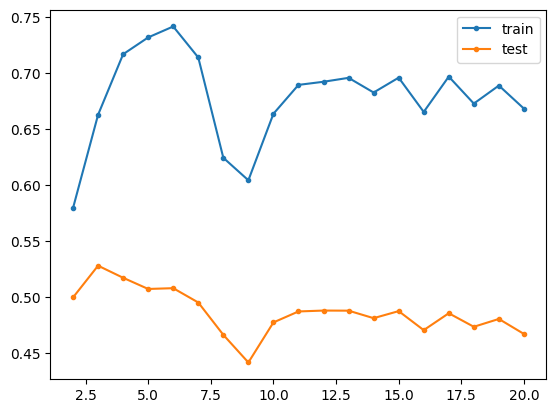

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
 _, train_acc = model.evaluate(trainX, trainy, verbose=0)
 _, test_acc = model.evaluate(testX, testy, verbose=0)
 return train_acc, test_acc
# Add one new layer and re-train only the new layer
# Add one new layer and re-train only the new layer while keeping the last layer frozen
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 8s - loss: 2.1258 - accuracy: 0.2362 - 8s/epoch - 10ms/step
Epoch 2/25
782/782 - 5s - loss: 1.9756 - accuracy: 0.3097 - 5s/epoch - 6ms/step
Epoch 3/25
782/782 - 5s - loss: 1.9152 - accuracy: 0.3344 - 5s/epoch - 6ms/step
Epoch 4/25
782/782 - 5s - loss: 1.8780 - accuracy: 0.3490 - 5s/epoch - 6ms/step
Epoch 5/25
782/782 - 5s - loss: 1.8514 - accuracy: 0.3580 - 5s/epoch - 6ms/step
Epoch 6/25
782/782 - 5s - loss: 1.8301 - accuracy: 0.3671 - 5s/epoch - 6ms/step
Epoch 7/25
782/782 - 5s - loss: 1.8121 - accuracy: 0.3732 - 5s/epoch - 6ms/step
Epoch 8/25
782/782 - 5s - loss: 1.7968 - accuracy: 0.3792 - 5s/epoch - 6ms/step
Epoch 9/25
782/782 - 5s - loss: 1.7831 - accuracy: 0.3852 - 5s/epoch - 6ms/step
Epoch 10/25
782/782 - 5s - loss: 1.7704 - accuracy: 0.3893 - 5s/epoch - 7ms/step
Epoch 11/25
782/782 - 5s - loss: 1.7590 - accuracy: 0.3921 - 5s/epoch - 6ms/step
Epoch 12/25
782/782 - 4s - loss: 1.7484 - accuracy: 0.3949 - 4s/epoch - 6ms/step
Epoch 13/25
782/782 - 4s - loss: 1.7

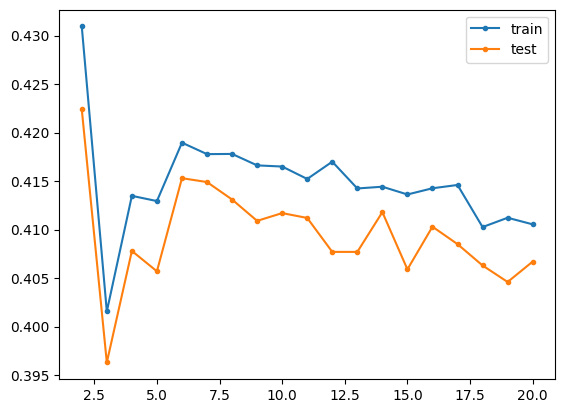

In [4]:

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
 _, train_acc = model.evaluate(trainX, trainy, verbose=0)
 _, test_acc = model.evaluate(testX, testy, verbose=0)
 return train_acc, test_acc
# Add one new layer and re-train only the new layer
# Add one new layer and re-train only the new layer while keeping the last layer frozen
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 8s - loss: 2.5335 - accuracy: 0.2261 - 8s/epoch - 11ms/step
Epoch 2/25
782/782 - 8s - loss: 1.9460 - accuracy: 0.2792 - 8s/epoch - 10ms/step
Epoch 3/25
782/782 - 8s - loss: 1.9240 - accuracy: 0.2830 - 8s/epoch - 10ms/step
Epoch 4/25
782/782 - 7s - loss: 1.9234 - accuracy: 0.2771 - 7s/epoch - 9ms/step
Epoch 5/25
782/782 - 7s - loss: 1.9151 - accuracy: 0.2752 - 7s/epoch - 9ms/step
Epoch 6/25
782/782 - 7s - loss: 1.9136 - accuracy: 0.2720 - 7s/epoch - 9ms/step
Epoch 7/25
782/782 - 8s - loss: 1.9165 - accuracy: 0.2670 - 8s/epoch - 10ms/step
Epoch 8/25
782/782 - 7s - loss: 1.9107 - accuracy: 0.2744 - 7s/epoch - 9ms/step
Epoch 9/25
782/782 - 7s - loss: 1.9196 - accuracy: 0.2690 - 7s/epoch - 10ms/step
Epoch 10/25
782/782 - 7s - loss: 1.9184 - accuracy: 0.2676 - 7s/epoch - 9ms/step
Epoch 11/25
782/782 - 7s - loss: 1.9563 - accuracy: 0.2411 - 7s/epoch - 10ms/step
Epoch 12/25
782/782 - 8s - loss: 1.9217 - accuracy: 0.2639 - 8s/epoch - 10ms/step
Epoch 13/25
782/782 - 8s - los

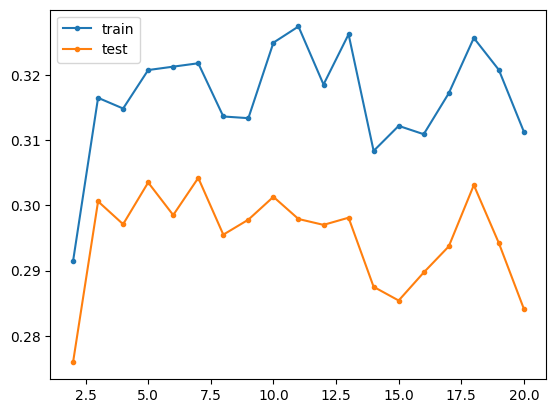

In [5]:

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = Adam(lr=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
 _, train_acc = model.evaluate(trainX, trainy, verbose=0)
 _, test_acc = model.evaluate(testX, testy, verbose=0)
 return train_acc, test_acc
# Add one new layer and re-train only the new layer
# Add one new layer and re-train only the new layer while keeping the last layer frozen
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


In [ ]:
# Get the base model
base_model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
scores[len(base_model.layers)] = (train_acc, test_acc)

# Fine-tune the model by adding and training one layer at a time
n_layers = 18

for i in range(n_layers):
    # Add a new layer to the model
    base_model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Add a new output layer with the correct number of units
    base_model.add(Dense(10, activation='softmax'))

    # Compile the model
    base_model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

    # Train the model with the new layer
    base_model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    # Evaluate the model
    train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy, testy)
    base_model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
    scores[len(base_model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 7s - loss: 1.8762 - accuracy: 0.3339 - 7s/epoch - 9ms/step
Epoch 2/25
782/782 - 5s - loss: 1.6991 - accuracy: 0.4032 - 5s/epoch - 7ms/step
Epoch 3/25
782/782 - 7s - loss: 1.6227 - accuracy: 0.4296 - 7s/epoch - 9ms/step
Epoch 4/25
782/782 - 7s - loss: 1.5702 - accuracy: 0.4478 - 7s/epoch - 9ms/step
Epoch 5/25
782/782 - 7s - loss: 1.5290 - accuracy: 0.4648 - 7s/epoch - 8ms/step
Epoch 6/25
782/782 - 6s - loss: 1.4935 - accuracy: 0.4783 - 6s/epoch - 7ms/step
Epoch 7/25
782/782 - 6s - loss: 1.4640 - accuracy: 0.4887 - 6s/epoch - 7ms/step
Epoch 8/25
782/782 - 6s - loss: 1.4374 - accuracy: 0.4964 - 6s/epoch - 7ms/step
Epoch 9/25
782/782 - 6s - loss: 1.4130 - accuracy: 0.5053 - 6s/epoch - 7ms/step
Epoch 10/25
782/782 - 6s - loss: 1.3935 - accuracy: 0.5114 - 6s/epoch - 7ms/step
Epoch 11/25
782/782 - 6s - loss: 1.3719 - accuracy: 0.5212 - 6s/epoch - 8ms/step
Epoch 12/25
782/782 - 6s - loss: 1.3524 - accuracy: 0.5265 - 6s/epoch - 8ms/step
Epoch 13/25
782/782 - 6s - loss: 1.33

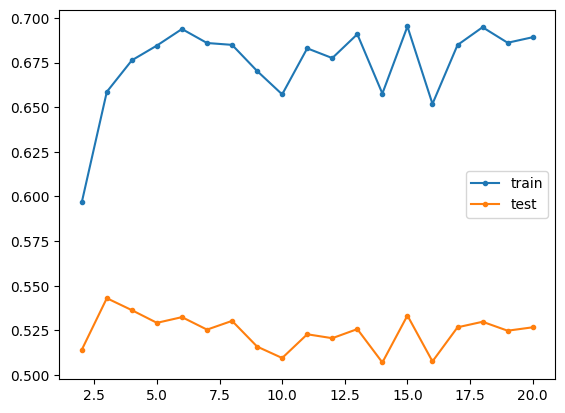

In [3]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.01, momentum=0.5)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
 _, train_acc = model.evaluate(trainX, trainy, verbose=0)
 _, test_acc = model.evaluate(testX, testy, verbose=0)
 return train_acc, test_acc
# Add one new layer and re-train only the new layer
# Add one new layer and re-train only the new layer while keeping the last layer frozen
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.5), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 9s - loss: 1.8809 - accuracy: 0.3293 - 9s/epoch - 12ms/step
Epoch 2/25
782/782 - 7s - loss: 1.7042 - accuracy: 0.4011 - 7s/epoch - 8ms/step
Epoch 3/25
782/782 - 5s - loss: 1.6266 - accuracy: 0.4313 - 5s/epoch - 7ms/step
Epoch 4/25
782/782 - 5s - loss: 1.5729 - accuracy: 0.4457 - 5s/epoch - 7ms/step
Epoch 5/25
782/782 - 6s - loss: 1.5324 - accuracy: 0.4641 - 6s/epoch - 7ms/step
Epoch 6/25
782/782 - 5s - loss: 1.4959 - accuracy: 0.4764 - 5s/epoch - 7ms/step
Epoch 7/25
782/782 - 5s - loss: 1.4673 - accuracy: 0.4856 - 5s/epoch - 7ms/step
Epoch 8/25
782/782 - 5s - loss: 1.4402 - accuracy: 0.4963 - 5s/epoch - 6ms/step
Epoch 9/25
782/782 - 5s - loss: 1.4155 - accuracy: 0.5025 - 5s/epoch - 6ms/step
Epoch 10/25
782/782 - 5s - loss: 1.3960 - accuracy: 0.5106 - 5s/epoch - 6ms/step
Epoch 11/25
782/782 - 5s - loss: 1.3768 - accuracy: 0.5179 - 5s/epoch - 6ms/step
Epoch 12/25
782/782 - 5s - loss: 1.3583 - accuracy: 0.5241 - 5s/epoch - 7ms/step
Epoch 13/25
782/782 - 5s - loss: 1.3

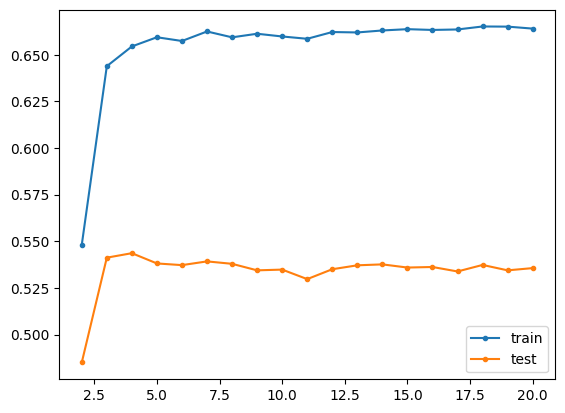

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import math

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.01, momentum=0.5)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model

# Learning rate scheduling function
def step_decay(epoch):
    initial_lr = 0.01
    drop = 0.5
    epochs_drop = 10
    lr = initial_lr * math.pow(drop, math.floor((1 + epoch) / epochs_drop))
    return lr

# Evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    return train_acc, test_acc

# Add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.5), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2, callbacks=[lr_scheduler])

# Get the base model
model = get_base_model(trainX, trainy)

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(step_decay)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

# Plotting
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


Epoch 1/25
782/782 - 9s - loss: 0.9669 - accuracy: 0.6582 - 9s/epoch - 11ms/step
Epoch 2/25
782/782 - 6s - loss: 0.9664 - accuracy: 0.6596 - 6s/epoch - 8ms/step
Epoch 3/25
782/782 - 6s - loss: 0.9664 - accuracy: 0.6587 - 6s/epoch - 8ms/step
Epoch 4/25
782/782 - 6s - loss: 0.9663 - accuracy: 0.6586 - 6s/epoch - 8ms/step
Epoch 5/25
782/782 - 7s - loss: 0.9679 - accuracy: 0.6575 - 7s/epoch - 9ms/step
Epoch 6/25
782/782 - 7s - loss: 0.9686 - accuracy: 0.6593 - 7s/epoch - 9ms/step
Epoch 7/25
782/782 - 6s - loss: 0.9665 - accuracy: 0.6593 - 6s/epoch - 7ms/step
Epoch 8/25
782/782 - 6s - loss: 0.9663 - accuracy: 0.6587 - 6s/epoch - 8ms/step
Epoch 9/25
782/782 - 6s - loss: 0.9665 - accuracy: 0.6592 - 6s/epoch - 7ms/step
Epoch 10/25
782/782 - 6s - loss: 0.9667 - accuracy: 0.6586 - 6s/epoch - 7ms/step
Epoch 11/25
782/782 - 6s - loss: 0.9667 - accuracy: 0.6588 - 6s/epoch - 8ms/step
Epoch 12/25
782/782 - 6s - loss: 0.9661 - accuracy: 0.6600 - 6s/epoch - 8ms/step
Epoch 13/25
782/782 - 5s - loss: 0.9

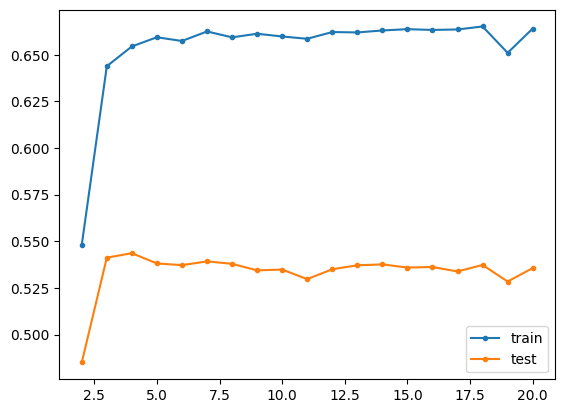

In [2]:
def unfreeze_softmax_layer(model):
    # Freeze all layers except the last one (softmax layer)
    for layer in model.layers:
        layer.trainable = False
    model.layers[-1].trainable = True

    # Compile the model with only the softmax layer trainable
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.5), metrics=['accuracy'])

    # Train only the softmax layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

unfreeze_softmax_layer(model)

# Evaluate the model after unfreezing the softmax layer
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[19] = (train_acc, test_acc)

# Plotting
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


Epoch 1/25
782/782 - 10s - loss: 0.9643 - accuracy: 0.6607 - 10s/epoch - 12ms/step
Epoch 2/25
782/782 - 7s - loss: 0.9658 - accuracy: 0.6598 - 7s/epoch - 9ms/step
Epoch 3/25
782/782 - 6s - loss: 0.9656 - accuracy: 0.6596 - 6s/epoch - 8ms/step
Epoch 4/25
782/782 - 6s - loss: 0.9654 - accuracy: 0.6588 - 6s/epoch - 8ms/step
Epoch 5/25
782/782 - 6s - loss: 0.9642 - accuracy: 0.6605 - 6s/epoch - 8ms/step
Epoch 6/25
782/782 - 6s - loss: 0.9666 - accuracy: 0.6592 - 6s/epoch - 8ms/step
Epoch 7/25
782/782 - 5s - loss: 0.9658 - accuracy: 0.6583 - 5s/epoch - 7ms/step
Epoch 8/25
782/782 - 6s - loss: 0.9659 - accuracy: 0.6592 - 6s/epoch - 7ms/step
Epoch 9/25
782/782 - 6s - loss: 0.9654 - accuracy: 0.6582 - 6s/epoch - 7ms/step
Epoch 10/25
782/782 - 5s - loss: 0.9659 - accuracy: 0.6592 - 5s/epoch - 7ms/step
Epoch 11/25
782/782 - 6s - loss: 0.9657 - accuracy: 0.6573 - 6s/epoch - 7ms/step
Epoch 12/25
782/782 - 6s - loss: 0.9650 - accuracy: 0.6586 - 6s/epoch - 8ms/step
Epoch 13/25
782/782 - 6s - loss: 0

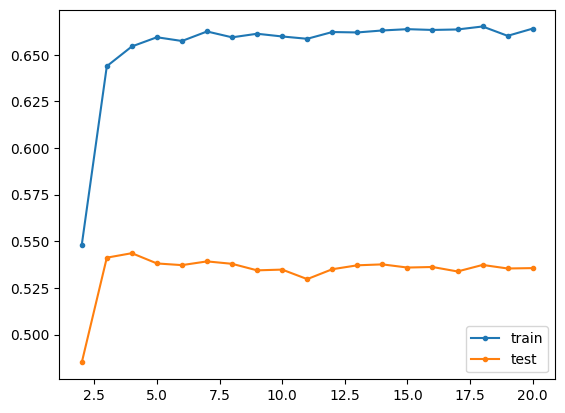

In [3]:
def unfreeze_softmax_layer(model):
    # Freeze all layers except the last one (softmax layer)
    for layer in model.layers:
        layer.trainable = False
    model.layers[-1].trainable = True

    # Compile the model with only the softmax layer trainable
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.5), metrics=['accuracy'])

    # Train only the softmax layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

unfreeze_softmax_layer(model)

# Evaluate the model after unfreezing the softmax layer
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[19] = (train_acc, test_acc)

# Plotting
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


Epoch 1/50
782/782 - 6s - loss: 0.9644 - accuracy: 0.6597 - 6s/epoch - 8ms/step
Epoch 2/50
782/782 - 6s - loss: 0.9646 - accuracy: 0.6594 - 6s/epoch - 8ms/step
Epoch 3/50
782/782 - 6s - loss: 0.9639 - accuracy: 0.6603 - 6s/epoch - 7ms/step
Epoch 4/50
782/782 - 5s - loss: 0.9642 - accuracy: 0.6587 - 5s/epoch - 7ms/step
Epoch 5/50
782/782 - 5s - loss: 0.9643 - accuracy: 0.6594 - 5s/epoch - 7ms/step
Epoch 6/50
782/782 - 5s - loss: 0.9649 - accuracy: 0.6598 - 5s/epoch - 7ms/step
Epoch 7/50
782/782 - 6s - loss: 0.9642 - accuracy: 0.6590 - 6s/epoch - 7ms/step
Epoch 8/50
782/782 - 5s - loss: 0.9632 - accuracy: 0.6609 - 5s/epoch - 7ms/step
Epoch 9/50
782/782 - 5s - loss: 0.9654 - accuracy: 0.6592 - 5s/epoch - 7ms/step
Epoch 10/50
782/782 - 5s - loss: 0.9640 - accuracy: 0.6594 - 5s/epoch - 7ms/step
Epoch 11/50
782/782 - 5s - loss: 0.9637 - accuracy: 0.6596 - 5s/epoch - 6ms/step
Epoch 12/50
782/782 - 5s - loss: 0.9636 - accuracy: 0.6603 - 5s/epoch - 7ms/step
Epoch 13/50
782/782 - 5s - loss: 0.96

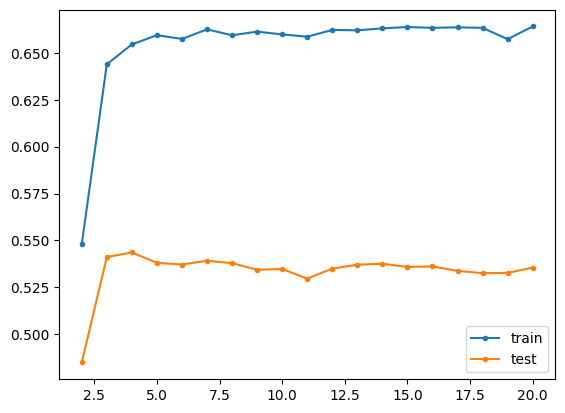

In [6]:
def unfreeze_softmax_layer(model):
    # Freeze all layers except the last one (softmax layer)
    for layer in model.layers:
        layer.trainable = False
    model.layers[-1].trainable = True

    # Compile the model with only the softmax layer trainable
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.5), metrics=['accuracy'])

    # Train only the softmax layer
    model.fit(trainX, trainy, epochs=50, batch_size=64, verbose=2)

unfreeze_softmax_layer(model)

# Evaluate the model after unfreezing the softmax layer
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[18] = (train_acc, test_acc)

# Plotting
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 7s - loss: 1.8577 - accuracy: 0.3353 - 7s/epoch - 9ms/step
Epoch 2/25
782/782 - 6s - loss: 1.6804 - accuracy: 0.4012 - 6s/epoch - 8ms/step
Epoch 3/25
782/782 - 7s - loss: 1.6080 - accuracy: 0.4277 - 7s/epoch - 9ms/step
Epoch 4/25
782/782 - 6s - loss: 1.5557 - accuracy: 0.4457 - 6s/epoch - 7ms/step
Epoch 5/25
782/782 - 6s - loss: 1.5271 - accuracy: 0.4583 - 6s/epoch - 8ms/step
Epoch 6/25
782/782 - 7s - loss: 1.4920 - accuracy: 0.4672 - 7s/epoch - 9ms/step
Epoch 7/25
782/782 - 6s - loss: 1.4641 - accuracy: 0.4769 - 6s/epoch - 7ms/step
Epoch 8/25
782/782 - 6s - loss: 1.4517 - accuracy: 0.4806 - 6s/epoch - 7ms/step
Epoch 9/25
782/782 - 6s - loss: 1.4310 - accuracy: 0.4903 - 6s/epoch - 8ms/step
Epoch 10/25
782/782 - 6s - loss: 1.4139 - accuracy: 0.4973 - 6s/epoch - 8ms/step
Epoch 11/25
782/782 - 6s - loss: 1.4028 - accuracy: 0.4995 - 6s/epoch - 8ms/step
Epoch 12/25
782/782 - 7s - loss: 1.3932 - accuracy: 0.5053 - 7s/epoch - 8ms/step
Epoch 13/25
782/782 - 7s - loss: 1.38

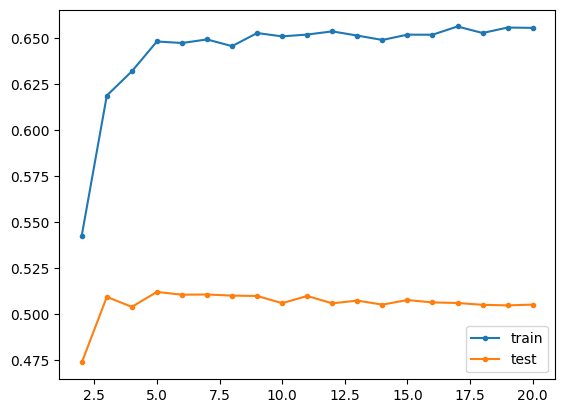

In [2]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX.reshape(-1, 32 * 32 * 3) / 255.0
testX = testX.reshape(-1, 32 * 32 * 3) / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model
def get_base_model(trainX, trainy):
    model = Sequential()
    model.add(Dense(256, input_dim=32*32*3, activation='tanh', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

    return model
# evaluate a fit model
def evaluate_model(model, trainX, testX, trainy, testy):
 _, train_acc = model.evaluate(trainX, trainy, verbose=0)
 _, test_acc = model.evaluate(testX, testy, verbose=0)
 return train_acc, test_acc
# Add one new layer and re-train only the new layer
# Add one new layer and re-train only the new layer while keeping the last layer frozen
def add_layer(model, trainX, trainy):
    output_layer = model.layers[-1]
    model.pop()

    for layer in model.layers:
        layer.trainable = False

    model.add(Dense(256, activation='tanh', kernel_initializer='he_uniform'))

    # Set the last layer to be non-trainable
    output_layer.trainable = False

    model.add(output_layer)

    # Compile the model before training
    model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

    # Train only the new layer
    model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add layers and evaluate the updated model
n_layers = 18

for i in range(n_layers):
    add_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

import matplotlib.pyplot as plt

plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


In [10]:
from keras.datasets import cifar10
from keras.layers import Conv2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from matplotlib import pyplot

# Load CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
trainX, testX = trainX / 255.0, testX / 255.0

# One-hot encode output variable
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# define and fit the base model
def get_base_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Flatten())
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# add one new layer and re-train only the new layer
def add_layer(model, trainX, trainy):
    # remember the current output layer
    output_layer = model.layers[-1]
    # remove the output layer
    model.pop()
    # mark all remaining layers as non-trainable
    for layer in model.layers:
        layer.trainable = False
    # add a new convolutional layer
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
    model.add(Flatten())
    # re-add the output layer
    model.add(output_layer)
    # fit model
    model.fit(trainX, trainy, epochs=10, verbose=0)  # Using fewer epochs for illustration purposes

# get the base model
model = get_base_model(trainX, trainy)

# evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# add layers and evaluate the updated model
n_layers = 3
for i in range(n_layers):
    # add layer
    add_layer(model, trainX, trainy)
    # evaluate model
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    # store scores for plotting
    scores[len(model.layers)] = (train_acc, test_acc)

# plot number of added layers vs accuracy
pyplot.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
pyplot.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
pyplot.legend()
pyplot.show()


> layers=4, train=0.107, test=0.103


ValueError: Input 0 of layer "conv2d_22" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [2]:
# import numpy as np
# from keras.datasets import cifar10
# from keras.utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.optimizers import SGD
# import matplotlib.pyplot as plt

# # Load the CIFAR-10 dataset
# (trainX, trainy), (testX, testy) = cifar10.load_data()

# # Reshape and normalize the input data
# trainX = trainX / 255.0
# testX = testX / 255.0

# # One-hot encode the target labels
# trainy = to_categorical(trainy)
# testy = to_categorical(testy)

# # Define and fit the base model
# def get_base_model(trainX, trainy):
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation='tanh', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax', trainable = False))

#     opt = SGD(lr=0.01, momentum=0.9)
#     model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#     model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

#     return model

# # Add convolutional layers and evaluate the updated model
# def add_convolutional_layers(model, trainX, trainy, testX, testy, scores):
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))

#     model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

#     history = model.fit(trainX, trainy, epochs=25, batch_size=64, verbose=2)

#     # Plot the accuracy for each layer
#     plt.plot(history.history['accuracy'], label=f'train (Layer {len(model.layers)})', marker='.')
#     plt.plot([len(model.layers)], history.history['accuracy'][-1], marker='o')
#     scores[len(model.layers)] = (history.history['accuracy'][-1], model.evaluate(testX, testy, verbose=0)[1])
#     plt.xlabel('Epochs')
#     plt.ylabel('Accuracy')
#     plt.legend()
#     plt.show()

# # Get the base model
# model = get_base_model(trainX, trainy)

# # Evaluate the base model
# scores = dict()
# train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
# print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
# scores[len(model.layers)] = (train_acc, test_acc)

# # Add convolutional layers and evaluate the updated model
# n_layers = 3  # You can change this number based on your requirements

# for i in range(n_layers):
#     add_convolutional_layers(model, trainX, trainy, testX, testy, scores)
#     model.summary()
#     print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))

# # Plot the overall accuracy graph
# plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
# plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
# plt.xlabel('Number of Layers')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
782/782 - 35s - loss: 1.5608 - accuracy: 0.4488 - 35s/epoch - 44ms/step
Epoch 2/25
782/782 - 34s - loss: 1.2404 - accuracy: 0.5642 - 34s/epoch - 43ms/step
Epoch 3/25
782/782 - 35s - loss: 1.1205 - accuracy: 0.6072 - 35s/epoch - 45ms/step
Epoch 4/25
782/782 - 36s - loss: 1.0105 - accuracy: 0.6484 - 36s/epoch - 46ms/step
Epoch 5/25
782/782 - 36s - loss: 0.9182 - accuracy: 0.6840 - 36s/epoch - 47ms/step
Epoch 6/25
782/782 - 37s - loss: 0.8452 - accuracy: 0.7127 - 37s/epoch - 47ms/step
Epoch 7/25
782/782 - 38s - loss: 0.7737 - accuracy: 0.7421 - 38s/epoch - 49ms/step
Epoch 8/25
782/782 - 38s - loss: 0.7140 - accuracy: 0.7656 - 38s/epoch - 49ms/step
Epoch 9/25
782/782 - 38s - loss: 0.6564 - accuracy: 0.7924 - 38s/epoch - 48ms/step
Epoch 10/25
782/782 - 40s - loss: 0.6085 - accuracy: 0.8147 - 40s/epoch - 51ms/step
Epoch 11/25
782/782 - 42s - loss: 0.5611 - accuracy: 0.8354 - 42s/epoch - 54ms/step
Epoch 12/25
782/782 - 40s - loss: 0.5236 - accuracy: 0.8525 - 40s/epoch - 51ms/step
E

NameError: name 'evaluate_model' is not defined

In [7]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Normalize the input data
trainX = trainX / 255.0
testX = testX / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Reshape the input data to have 4 dimensions
trainX = trainX.reshape(-1, 32, 32, 3)
testX = testX.reshape(-1, 32, 32, 3)

# # Define and fit the base model
# def get_base_model(trainX, trainy):
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation='tanh', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))

#     opt = SGD(lr=0.01, momentum=0.9)
#     model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

#     model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)

#     return model

# # Add one new convolutional layer and re-train only the new layer
# def add_conv_layer(base_model, trainX, trainy, scores):
#     model = Sequential()
#     for layer in base_model.layers[:-1]:  # Exclude the last layer
#         model.add(layer)
    
#     # Flatten the output of the Dense layer
#     model.add(Flatten())
    
#     # Reshape to match the input shape of the Conv2D layer
#     model.add(Reshape((16, 16, 2)))  # Adjust the shape based on your needs
    
#     model.add(Conv2D(32, (3, 3), activation='relu'))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(256, activation='tanh', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))

#     # Compile the model before training
#     model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01, momentum=0.9), metrics=['accuracy'])

#     # Train only the new convolutional layer
#     history = model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)
    
#     # Record the accuracy for the added layer
#     scores[len(model.layers)] = history.history['accuracy']

# # Get the base model
# base_model = get_base_model(trainX, trainy)

# # Evaluate the base model
# scores = dict()
# train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy, testy)
# print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
# scores[len(base_model.layers)] = (train_acc, test_acc)

# # Add convolutional layers and evaluate the updated model
# n_layers = 19  # You can adjust the number of convolutional layers

# for i in range(n_layers):
#     add_conv_layer(base_model, trainX, trainy, scores)
#     train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy, testy)
#     base_model.summary()
#     print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
#     scores[len(base_model.layers)] = (train_acc, test_acc)

# # Plot accuracies for each layer
# for layer, acc in scores.items():
#     plt.plot(range(1, 26), acc, label=f'Layer {layer}')

# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Build the initial model without Dense and Flatten layers
def build_initial_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Function to add a Conv2D layer to the model
def add_conv_layer(model):
    # Create a new model excluding the last two layers
    new_model = models.Sequential()
    for layer in model.layers[:-2]:
        new_model.add(layer)

    # Add a new Conv2D layer
    new_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    # Skip MaxPooling2D to avoid negative dimensions
    # new_model.add(layers.MaxPooling2D((2, 2)))

    # Re-add Flatten layer
    new_model.add(layers.Flatten())

    # Create a new Dense layer with the same configuration
    dense_layer = layers.Dense(10, activation='softmax', kernel_initializer=model.layers[-1].kernel_initializer)
    
    # Add the new Dense layer
    new_model.add(dense_layer)

    # Freeze the Dense layer
    new_model.layers[-1].trainable = False

    return new_model

# Greedy layerwise training
def greedy_layerwise_training(model, num_layers_to_add, train_base=True):
    accuracies = []

    for i in range(num_layers_to_add):
        # Freeze existing layers
        for layer in model.layers[:-2]:
            layer.trainable = False

        # Add a new Conv2D layer and re-add Flatten layer
        model = add_conv_layer(model)

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        # Display model summary before and after adding the layer
        print(f'\nModel summary before training added layer {i + 1}:\n')
        model.summary()

        if train_base:
            # Train the model on the CIFAR-10 dataset for one epoch
            history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels), verbose=0)
            accuracies.append(history.history['accuracy'][0])

        # Unfreeze the last added Conv2D layer for training
        model.layers[-2].trainable = True

        # Train only the newly added Conv2D layer and collect accuracy
        history = model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels), verbose=0)
        accuracies.append(history.history['accuracy'][0])

        # Display model summary after training the added layer
        print(f'\nModel summary after training added layer {i + 1}:\n')
        model.summary()

    return model, accuracies

# Build the initial model
initial_model = build_initial_model()

# Train the base model
initial_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
initial_model.fit(train_images, train_labels, epochs=25, batch_size=32, validation_data=(test_images, test_labels))

# Perform greedy layerwise training by adding convolutional layers
final_model, layer_accuracies = greedy_layerwise_training(initial_model, num_layers_to_add=14, train_base=False)

# Evaluate the final model
test_loss, test_acc = final_model.evaluate(test_images, test_labels)
print(f'\nFinal model test accuracy: {test_acc}')

# Save accuracies to a file
with open('layer_accuracies.txt', 'w') as file:
    for accuracy in layer_accuracies:
        file.write(f'{accuracy}\n')

# Plot accuracy vs layer added
plt.plot(range(1, len(layer_accuracies) + 1), layer_accuracies, marker='o')
plt.title('Accuracy vs Layers Added')
plt.xlabel('Number of Layers Added')
plt.ylabel('Accuracy')
plt.show()


Epoch 1/25
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4772 - accuracy: 0.4810 - val_loss: 1.3135 - val_accuracy: 0.5362
Epoch 2/25
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1932 - accuracy: 0.5865 - val_loss: 1.2820 - val_accuracy: 0.5527
Epoch 3/25
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0644 - accuracy: 0.6340 - val_loss: 1.1773 - val_accuracy: 0.5945
Epoch 4/25
1563/1563 [==============================] - 32s 21ms/step - loss: 0.9710 - accuracy: 0.6652 - val_loss: 1.2305 - val_accuracy: 0.5869
Epoch 5/25
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8949 - accuracy: 0.6926 - val_loss: 1.2124 - val_accuracy: 0.5873
Epoch 6/25
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8362 - accuracy: 0.7127 - val_loss: 1.2246 - val_accuracy: 0.5911
Epoch 7/25
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7724 - accuracy: 0.7340 - val_loss: 1.2410 -

C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(



Model summary after training added layer 1:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                250890    
                                                                 
Total params: 261,034
Trainable params: 9,248
Non-trainable params: 251,786
_________________________________________________________________

Model summary before training added layer 2:

Model: "sequential_2"
_____________________________________________________________

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

# Build the initial model without Dense and Flatten layers
def build_initial_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    return model

# Function to add a Conv2D layer to the model
def add_conv_layer(model):
    # Create a new model excluding the last two layers
    new_model = models.Sequential()
    for layer in model.layers[:-2]:
        new_model.add(layer)

    # Add a new Conv2D layer
    new_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    # Skip MaxPooling2D to avoid negative dimensions
    # new_model.add(layers.MaxPooling2D((2, 2)))

    # Re-add Flatten layer
    new_model.add(layers.Flatten())

    # Create a new Dense layer with the same configuration
    dense_layer = layers.Dense(10, activation='softmax', kernel_initializer=model.layers[-1].kernel_initializer)
    
    # Add the new Dense layer
    new_model.add(dense_layer)

    # Freeze the Dense layer
    new_model.layers[-1].trainable = False

    return new_model

# Greedy layerwise training
def greedy_layerwise_training(model, num_layers_to_add, train_base=True):
    accuracies = []

    for i in range(num_layers_to_add):
        # Freeze existing layers
        for layer in model.layers[:-2]:
            layer.trainable = False

        # Add a new Conv2D layer and re-add Flatten layer
        model = add_conv_layer(model)

        # Compile the model
        model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

        if train_base:
            # Train the model on the CIFAR-10 dataset for one epoch
            history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels), verbose=1)
            accuracies.append(history.history['accuracy'][-1])

        # Unfreeze the last added Conv2D layer for training
        model.layers[-2].trainable = True

        # Train only the newly added Conv2D layer and collect accuracy
        history = model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels), verbose=1)
        accuracies.append(history.history['accuracy'][-1])

        # Display model summary after training the added layer
        print(f'\nModel summary after training added layer {i + 1}:\n')
        model.summary()

    return model, accuracies

# Build the initial model
initial_model = build_initial_model()

# Train the base model
initial_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
initial_model.fit(train_images, train_labels, epochs=25, validation_data=(test_images, test_labels), verbose=1)

# Perform greedy layerwise training by adding convolutional layers
final_model, layer_accuracies = greedy_layerwise_training(initial_model, num_layers_to_add=15, train_base=False)

# Evaluate the final model
test_loss, test_acc = final_model.evaluate(test_images, test_labels)
print(f'\nFinal model test accuracy: {test_acc}')

# Save accuracies to a file
with open('layer_accuracies.txt', 'w') as file:
    for accuracy in layer_accuracies:
        file.write(f'{accuracy}\n')

# Plot accuracy vs layer added
plt.plot(range(1, len(layer_accuracies) + 1), layer_accuracies, marker='o')
plt.title('Accuracy vs Layers Added')
plt.xlabel('Number of Layers Added')
plt.ylabel('Accuracy')
plt.show()


1563/1563 [==============================] - 45s 28ms/step - loss: 1.4881 - accuracy: 0.4783 - val_loss: 1.3039 - val_accuracy: 0.5419

Model summary before training added layer 1:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                250890    
                                                                 
Total params: 261,034
Trainable params: 260,138
Non-trainable params: 896
______________________________________________________________

KeyboardInterrupt: 

In [47]:
from keras.layers import Reshape, Dense, Conv2D, Flatten, concatenate
trainy_int = np.argmax(trainy, axis=1)
testy_int = np.argmax(testy, axis=1)
# Function to add a new Conv2D layer to the model
def add_conv_layer(model):
    # Define the new Conv2D layer
    new_conv_layer = Conv2D(32, (3, 3), activation='relu', padding='same')(model.layers[0].output)
    
    # Flatten the output of the existing model
    flat = Flatten()(model.layers[-1].output)
    
    # Combine the new Conv2D layer with the existing layers
    combined = concatenate([Reshape((32, 32, 1))(new_conv_layer), Reshape((32, 32, 1))(flat)])
    
    # Add a Dense layer
    x_dense = Dense(128, activation='relu')(combined)
    
    # Output layer
    x_output = Dense(10, activation='softmax')(x_dense)
    
    # Create a new model
    new_model = Model(inputs=model.inputs, outputs=x_output)
    
    return new_model

# Function to evaluate the model
def evaluate_model(model, trainX, testX, trainy, testy):
    # Assuming trainy and testy are in integer format (not one-hot encoded)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Ensure trainy and testy are in integer format
    trainy = trainy.reshape((-1,))  # Flatten to a 1D array if needed
    testy = testy.reshape((-1,))  # Flatten to a 1D array if needed
    
    model.fit(trainX, trainy, epochs=25, verbose=0)
    
    # Ensure trainy and testy are in integer format
    _, train_acc = model.evaluate(trainX, trainy, verbose=0)
    _, test_acc = model.evaluate(testX, testy, verbose=0)
    
    return train_acc, test_acc


def create_base_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=input_shape, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Now you can call this function in your code
base_model = create_base_model(trainX.shape[1:])

# Initialize the base model
base_model = create_base_model(trainX.shape[1:])

# Evaluate the base model
scores = dict()
# Evaluate the base model
# Evaluate the base model
train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy_int, testy_int)
print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
scores[len(base_model.layers)] = (train_acc, test_acc)

# Add Conv2D layers and evaluate
n_layers = 19
for i in range(n_layers):
    base_model = add_conv_layer(base_model)
    train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy_int, testy_int)
    print('> layers=%d, train=%.3f, test=%.3f' % (len(base_model.layers), train_acc, test_acc))
    scores[len(base_model.layers)] = (train_acc, test_acc)


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
      app.start()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever
      self._run_once()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once
      handle._run()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Prathav\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Prathav\AppData\Local\Temp\ipykernel_11304\1438579424.py", line 61, in <cell line: 61>
      train_acc, test_acc = evaluate_model(base_model, trainX, testX, trainy_int, testy_int)
    File "C:\Users\Prathav\AppData\Local\Temp\ipykernel_11304\1438579424.py", line 35, in evaluate_model
      model.fit(trainX, trainy, epochs=25, verbose=0)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32768,10] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_36616]

In [36]:
# Reshape to (None, 32, 32, 1) for grayscale images
trainX_gray = trainX.reshape(-1, 32, 32, 3)
testX_gray = testX.reshape(-1, 32, 32, 3)

print("Shape of trainX_gray:", trainX_gray.shape)
print("Shape of trainy:", trainy.shape)
print("Number of samples in trainX_gray:", trainX_gray.shape[0])
print("Number of samples in trainy:", trainy.shape[0])


Shape of trainX_gray: (50000, 32, 32, 3)
Shape of trainy: (50000, 10)
Number of samples in trainX_gray: 50000
Number of samples in trainy: 50000


In [48]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX / 255.0
testX = testX / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model using the Functional API
def get_base_model(trainX, trainy):
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)

    return model

from keras.layers import Reshape
from keras.layers import concatenate

def add_conv_layer(model, trainX, trainy):
    # Add Conv2D layer
    x_conv = Conv2D(32, (3, 3), activation='relu', padding='same')(model.layers[-4].output)
    x_pool = MaxPooling2D((2, 2))(x_conv)
    x_flat = Flatten()(x_pool)
    x_dense = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x_flat)
    x_output = Dense(10, activation='softmax')(x_dense)

    # Combine the new Conv2D layer with the existing layers
    combined = concatenate([model.layers[0].output, Reshape((16, 16, 1))(x_output)])
    x = Flatten()(combined)
    x = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x)
    x = Dense(10, activation='softmax')(x)

    # Create the final model with the combined layers
    final_model = Model(inputs=model.input, outputs=x)

    # Compile the model before training
    opt = SGD(lr=0.01, momentum=0.9)
    final_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Train the final model
    final_model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)

    return final_model


# Get the base model
model = get_base_model(trainX, trainy)



# Add convolutional layers and evaluate the updated model
n_layers = 19

for i in range(n_layers):
    model = add_conv_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

# Plotting the results
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


782/782 - 34s - loss: 1.5584 - accuracy: 0.4482 - 34s/epoch - 44ms/step


ValueError: Exception encountered when calling layer "reshape" (type Reshape).

total size of new array must be unchanged, input_shape = [10], output_shape = [16, 16, 1]

Call arguments received by layer "reshape" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)

In [ ]:
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Flatten, concatenate
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Reshape and normalize the input data
trainX = trainX / 255.0
testX = testX / 255.0

# One-hot encode the target labels
trainy = to_categorical(trainy)
testy = to_categorical(testy)

# Define and fit the base model using the Functional API
def get_base_model(trainX, trainy):
    inputs = Input(shape=(32, 32, 3))
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = Flatten()(x)
    x = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)

    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)

    return model

from keras.layers import Reshape

def add_conv_layer(model, trainX, trainy):
    # Add Conv2D layer
    x_conv = Conv2D(32, (3, 3), activation='relu', padding='same')(model.layers[0].output)
    x_flat = Flatten()(x_conv)
    x_dense = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x_flat)
    x_output = Dense(10, activation='softmax')(x_dense)

    # Combine the new Conv2D layer with the existing layers
    reshaped_input = Reshape((32, 32, 1))(model.layers[0].output)
    reshaped_output = Reshape((32, 32, 1))(x_output)
    combined = concatenate([reshaped_input, reshaped_output])
    x = Flatten()(combined)
    x = Dense(256, activation='tanh', kernel_initializer='he_uniform')(x)
    x = Dense(10, activation='softmax')(x)

    # Create the final model with the combined layers
    final_model = Model(inputs=model.input, outputs=x)

    # Compile the model before training
    opt = SGD(lr=0.01, momentum=0.9)
    final_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Train the final model
    final_model.fit(trainX, trainy, epochs=1, batch_size=64, verbose=2)

    return final_model




# Get the base model
model = get_base_model(trainX, trainy)

# Evaluate the base model
scores = dict()
train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
scores[len(model.layers)] = (train_acc, test_acc)

# Add convolutional layers without MaxPooling2D and evaluate the updated model
n_layers = 19

for i in range(n_layers):
    model = add_conv_layer(model, trainX, trainy)
    train_acc, test_acc = evaluate_model(model, trainX, testX, trainy, testy)
    model.summary()
    print('> layers=%d, train=%.3f, test=%.3f' % (len(model.layers), train_acc, test_acc))
    scores[len(model.layers)] = (train_acc, test_acc)

# Plotting the results
plt.plot(list(scores.keys()), [scores[k][0] for k in scores.keys()], label='train', marker='.')
plt.plot(list(scores.keys()), [scores[k][1] for k in scores.keys()], label='test', marker='.')
plt.legend()
plt.show()


C:\Users\Prathav\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


782/782 - 50s - loss: 1.6308 - accuracy: 0.4214 - 50s/epoch - 64ms/step
> layers=5, train=0.522, test=0.505


ValueError: Exception encountered when calling layer "reshape_2" (type Reshape).

total size of new array must be unchanged, input_shape = [32, 32, 3], output_shape = [32, 32, 1]

Call arguments received by layer "reshape_2" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)